## Introduction

This assessment aims to make you familiar with word embeddings and fine-tuning them for a specific downstream task. This assignment will be in two parts: **Part1: Fasttext** and **Part2: POS Tagging**. The due date of the exercise is **16th of April, 11.59pm**. You are going to submit your work via Blackboard.


## Install PyTorch (If you are working locally)

1. Have the latest version of Anaconda installed on your machine.
2. Create a new conda environment starting from Python 3.7. In this setup example, we'll call it `torch_env`.
3. Run the command: `conda activate torch_env`
4. Run the command: `pip3 install torch==1.13.1`

## or just work on this notebook on google colab.
https://colab.research.google.com/

For this assignment, you don't need a GPU to train the models. However, if you want to use a GPU, you can follow the steps below to create a GPU backed environment. https://www.youtube.com/watch?v=TI9mTiTKoUc&ab_channel=SinaTofighi This video shows how you can open a Colab, request and allocate a GPU for your work. You can follow the steps to create your GPU backed environment.

# COMP542/442 - Assignment 1 - Part 1

The assignment consists of the following parts:
* **Part I**: Preparation
  * Installing the required packages
  * Downloading data
  * Preprocessing
* **Part II**: Model Training
  * Training word embeddings on the Turkish dataset
  * Training with Contuinuous Bag of Words approach (Optional)
  * Trianing with Skipgram approach
* **Part III**: Observations
  * Make observations for get_nearest_neighbors and get_analogies method
  * Compare CBOW with Skipgram (Optional)

##### Inline question 1: Describe n-gram, BPE vs wordpiece/unigram tokenization methods with one or two sentences. Please compare their advantages and disadvantages over each other.

<font color='red'>Your answer: In n-gram tokenization, tokens are n consecutive words or characters from the training corpus which are commonly occuring. BPE is a method that replaces the most occuring characters in the training corpus with a unique byte. It begins by the characters of the training copus and based on the amount of tokens we want or the length of the tokens which we want, splits the data to the unique tokens. WordPiece is a tokenization method like the BPE however it takes the frequency of the words in the training corpus to the account and by the bayesian rule it find the most occuring character. Compared to the n-gram method, which is a effective and simple algorithm to use in a small dataset, BPE and WordPiece handle the out of vocabulary problem but they will result in long tokens or huge amount of vocab size. I think WordPiece is better method since it is more statistical however BPE is a better in terms of space complexity. </font>


## Installing fastText

You may follow the instruction from the documentation:
* https://fasttext.cc/docs/en/support.html
* https://fasttext.cc/docs/en/unsupervised-tutorial.html

In [56]:
!git clone https://github.com/facebookresearch/fastText.git
%cd fastText
!pip install .
!python setup.py install
%cd ..

/bin/bash: /home/user/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
fatal: destination path 'fastText' already exists and is not an empty directory.
/home/user/Assigment_1/fastText
/bin/bash: /home/user/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Processing /home/user/Assigment_1/fastText
  Preparing metadata (setup.py) ... done
  Created wheel for fasttext: filename=fasttext-0.9.2-cp38-cp38-linux_x86_64.whl size=4527951 sha256=3c89fbf5e7a446724311315625742dbda54127bc9d0c9d2287a73339a0d1555e
  Stored in directory: /tmp/pip-ephem-wheel-cache-jy7uubb3/wheels/83/7f/50/1a1ad96f75266b97857ef058b21bbcbc22479171bd4d1e1536
Successfully built fasttext
  Attempting uninstall: fasttext
    Found existing installation: fasttext 0.9.2
    Uninstalling fasttext-0.9.2:
      Successfully uninstalled fasttext-0.9.2
/bin/bash: /home/user/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available

In [1]:
# Test if installation was successful
import fasttext

We use the following data for training the embeddings: trwiki-20230401-pages-articles-multistream.xml


**Download preprocessing script**

A raw Wikipedia dump contains a lot of HTML / XML data, for preprocessing it, you may use the script from: https://github.com/hghodrati/wikifil.git

In [58]:
!git clone https://github.com/hghodrati/wikifil.git

/bin/bash: /home/user/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
fatal: destination path 'wikifil' already exists and is not an empty directory.


In [59]:
# preprocess xml and save to new file
!perl wikifil/wikifil.pl dataset/trwiki-20230401-pages-articles-multistream.xml > dataset/data_embed

/bin/bash: /home/user/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [60]:
# Visualize data
!head -c 80 dataset/data_embed

/bin/bash: /home/user/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)

 one one six two do um yeri onon nehri d l n boldak mo olistan l m tarihi l m y

## Training with fastText

You may find the documentation for training word respresentations here: 
* https://fasttext.cc/docs/en/unsupervised-tutorial.html
* https://fasttext.cc/docs/en/python-module.html#train_unsupervised-parameters

You may use the embedding dimension as 100, which is default by fasttext

In [1]:
import fasttext

EMBEDDING_DIM = 100
#embed_model_cbow = fasttext.train_unsupervised('dataset/data_embed', "cbow")

You will need to train the word embedding using two approaches:
* Continuous Bag of words
* Skipgram
After training, save the models in their respective paths

You may refer to the tutorial/ documentation for that

In [2]:
#embed_model_skipgram = fasttext.train_unsupervised('dataset/data_embed', "skipgram")

In [3]:
#%mkdir results
CBOW_EMBED = "results/embed_cbow.bin"
SKIPGRAM_EMBED = "results/embed_skipgram.bin"

In [4]:
#embed_model_cbow = None
#embed_model_cbow.save_model(CBOW_EMBED)
embed_model_cbow = fasttext.load_model(CBOW_EMBED)

In [5]:
# embed_model_skipgram = None
#embed_model_skipgram.save_model(SKIPGRAM_EMBED)
embed_model_skipgram = fasttext.load_model(SKIPGRAM_EMBED)

In [6]:
print(embed_model_skipgram.words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
print(embed_model_cbow['kral']) 

[ 4.1007600e+00  3.4490228e-01  8.0414349e-01 -2.5063019e+00
 -1.9068347e+00 -1.0122048e+00  6.9141626e+00  8.2618630e-01
  9.4070977e-01 -2.1726651e+00  2.8551617e-01 -7.3075193e-01
 -6.5590829e-01  3.1503453e+00  4.5543879e-02 -1.5501798e+00
  2.1395493e+00  1.6544478e+00  2.0236478e+00 -7.1101052e-01
  1.8283714e+00  4.0808711e+00 -5.3792195e+00 -4.8359776e+00
  2.3318946e-01 -1.7571269e+00  4.6081552e-01 -1.3504039e+00
  1.0706295e-03 -5.3035176e-01  8.4683889e-01  3.2952580e+00
  8.8402629e-01 -3.4342284e+00  2.8206408e+00  8.7897730e-01
 -2.8959846e+00 -1.2435579e+00  1.0145502e+00  5.1807990e+00
  1.4082932e+00 -2.5811980e+00 -2.4275184e+00 -3.9203284e+00
 -1.0761820e+00 -5.9505856e-01 -4.3454795e+00  5.4102483e+00
  1.1593803e+00 -3.5236945e+00 -2.8242352e+00  4.3899255e+00
 -2.8246078e+00  3.2495835e+00 -1.2662131e+00  1.4608520e+00
 -2.7134430e+00  6.1134255e-01 -4.7933526e+00  2.6995301e-01
  1.4089651e+00  2.9503620e+00 -4.1231629e-01  3.2022161e+00
 -6.9453317e-01 -1.34992

In [8]:
word = "king"

In [9]:
embed_model_cbow.get_nearest_neighbors(word)

[(0.8440611958503723, 'kingpins'),
 (0.8152329921722412, 'kingz'),
 (0.8085706233978271, 'kingwell'),
 (0.8036988973617554, 'kingmaker'),
 (0.8029521107673645, 'kingsway'),
 (0.7967582941055298, 'kingsage'),
 (0.7956608533859253, 'kingswood'),
 (0.7917494773864746, 'kingsroad'),
 (0.7913044095039368, 'kinglake'),
 (0.7893604636192322, 'kingdon')]

In [10]:
print(embed_model_skipgram['kral']) 

[ 0.18604445 -0.2818999   0.13193433 -0.39220366 -0.31412542  0.23857975
  0.02378882 -0.09700847  0.2905494   0.15134282  0.03737711  0.07750681
  0.28214267  0.20303902 -0.10151365 -0.5320002  -0.38554305 -0.24702428
 -1.0122051  -0.20799765  0.49024433  0.8015506   0.29683602 -0.58504754
  0.113309    0.58903295 -0.09424364 -0.7546504   0.42896152 -0.07706961
 -0.14929202  0.07106905 -0.8398117  -0.25919768 -0.09121987  0.5113179
 -0.19160388  0.12193576  0.01474202 -0.06964729 -0.17348485 -0.2358323
 -0.5287078   0.20490167  0.22372136 -0.48620355  0.2689173   0.614306
 -0.42356604  0.4253149  -0.35115767  0.00549644 -0.23007154  0.09596586
 -0.19162396 -0.09205239  0.23918808 -0.19745202 -0.07825388 -0.20980458
  0.14097025  0.21410215 -0.3705782   0.35723063 -0.20759103  0.22480038
 -0.39899424 -0.1697968  -0.30130577 -0.20834745 -0.32677206  0.05475534
  0.04687861 -0.15337987 -0.43218908  0.8475256   0.39446008  0.10356147
  0.15976135 -0.47797313  0.47152737 -0.72310174 -0.358

In [11]:
embed_model_skipgram.get_nearest_neighbors(word)

[(0.7722301483154297, 'kingsroad'),
 (0.7715986967086792, 'kingpins'),
 (0.770132839679718, 'bloodgood'),
 (0.7678940892219543, 'queen'),
 (0.7554162740707397, 'bountiful'),
 (0.7551208138465881, 'shambles'),
 (0.7534496784210205, 'froggatt'),
 (0.7479894161224365, 'rush'),
 (0.7466498017311096, 'tygers'),
 (0.7457407116889954, 'brides')]

#### Inline Question 2: Find an example of an analogy that holds, using the `get_analogies` function. Explain the analogy and also how the analogies are calculated.

<font color='red'>Your answer: In word embedding models, the words are represented as vectors in a high dimensional space. based on this assumption the analogies could be represented by the equations between the words. For intance 3 words are passed to this funtion and it calculates the analogy by D = B - A + C. On the other way around it could be said that "A is to B as C is to D"</font>


In [12]:
embed_model_skipgram.get_analogies('eat', 'hungry', 'drink')

[(0.6739562153816223, 'eats'),
 (0.6445155739784241, 'cockta'),
 (0.6443719863891602, 'drinks'),
 (0.6165286302566528, 'soup'),
 (0.6148820519447327, 'food'),
 (0.6135843992233276, 'cocktails'),
 (0.6135385036468506, 'tariffs'),
 (0.6098132729530334, 'cooking'),
 (0.6070722341537476, 'drinkboy'),
 (0.604640007019043, 'rubatt')]

# COMP542/442 - Assignment 1 - Part 2

In this assignment, we are implementing an RNN-based POS (Part-of-Speech) tagger using BiLSTM (bidirectional Long Short-Term Memory) networks. 

The assignment consists of the following parts:
* **Part I**: Preparation
  * Installing the required packages
  * Data loading and preprocessing
  * Creating the datasets and dataloaders
* **Part II**: Model Implementation and Training
  * Implementing the BiLSTMPOS Tagger model
  * Defining training and evaluation functions
  * Running the training loop and observing the loss and accuracy
  * Plotting the training metrics such as loss and accuracy
  * Saving the model
* **Part III**: Initializating BiLSTM with fastText Embeddings
  * Loading the fastText model
  * Initializating with fastText and BiLSTM models
  * Training the model
  * Evaluating the model

Throughout the assignment, you will work with a POS dataset to train and test the model to recognize different POS tags for the given sentences. You also have the option to use this notebook on Google Colab that allows you to allocate a GPU for faster training.

For more details about the POS tags, check the following link: https://universaldependencies.org/tr/pos/index.html

# Part I. Preparation

First, we load the Part-of-the-Speech (POS) dataset. Make sure you have downloaded the dataset using the provided script. Check the assignment handout for more details.

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from typing import List, Tuple, Dict
import numpy as np
import random
from torch.nn.utils.rnn import pad_sequence
import time
from tqdm import tqdm
from matplotlib import pyplot as plt
import random
from collections import Counter

In [14]:
#Set the seeds for reproducibility
SEED = 542

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

You have an option to **use GPU by setting the flag to True below**. It is not necessary to use GPU for this assignment. Note that if your computer does not have CUDA enabled, `torch.cuda.is_available()` will return False and this notebook will fallback to CPU mode.

The global variables `dtype` and `device` will control the data types throughout this assignment. 

In [15]:
USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('using device:', device)

using device: cuda


In [16]:
def parse_file(file_path):
    """
    Parses a file in the Universal Dependencies (UD) annotation style and returns a list of all the sentences in the file.
    Note: The data files you need in this part of the assignemnt are stored under the dataset/ directory. You can open the
    files to have a better understanding of the format. If you want to learn more about the POS tags, you can visit the
    Universal Dependencies website: https://universaldependencies.org/tr/pos/index.html

    The output should be a list of tuples, where each tuple represents a sentence and contains (word, POS tag) pairs for each
    word in the sentence. For example, the following sentence:

    "The quick brown fox jumps over the lazy dog."
    should be represented as:
    [("The", "DET"), ("quick", "ADJ"), ("brown", "ADJ"), ("fox", "NOUN"), ("jumps", "VERB"), ("over", "ADP"), ("the", "DET"), ("lazy", "ADJ"), ("dog", "NOUN"), (".", "PUNCT")]
    
    Args:
    file_path (str): The path to the file to be parsed.
    
    Returns:
    list: A list of tuples, where each tuple represents a sentence and contains (word, POS tag) pairs for each word in the sentence.
    """
    # *****START OF YOUR CODE*****
    file1 = open(file_path, 'r')
    Lines = file1.readlines()
    words_roles = []

    for line in Lines:
        if line[0].isdigit():
            words_roles.append(line.strip().split('\t'))
        
    words_roles = np.array(words_roles)

    sentences = []
    sentence = []

    for i in range(words_roles.shape[0]):
        num_ = words_roles[i][0]
        word_ = words_roles[i][1]
        pos_ = words_roles[i][3]
        if num_ == "1":
            sentences.append(sentence)
            sentence = []
        if pos_ == '_':
            sentence.append((word_, '<UNK>'))
        if pos_!= '_':
            sentence.append((word_, pos_))

        
    sentences.append(sentence)
    sentences.remove(sentences[0])
    return sentences
    # *****END OF YOUR CODE*****


In [17]:
def build_vocab(data: List[List[Tuple[str, str]]]) -> Tuple[Dict[str, int], Dict[str, int]]:
    """
    Builds a vocabulary of words and part-of-speech (POS) tags based on the input data. Don't forget to add special tokens (e.g. <PAD>, <UNK>, etc.)

    Args:
    data (List[List[Tuple[str, str]]]): A list of sentences, where each sentence is represented as a list of (word, POS tag) tuples.

    Returns:
    Tuple[Dict[str, int], Dict[str, int]]: A tuple containing two dictionaries. The first dictionary maps words to their index in the vocabulary, and the second dictionary maps POS tags to their index in the vocabulary.
    """  
    # *****START OF YOUR CODE*****
    
    words_ = [words[0] for sentence_ in data for words in sentence_]
    pos_tags = [words[1] for sentence_ in data for words in sentence_]
    
    uni_words =list(set(words_))
    uni_tags = list(set(pos_tags))
    
    special_tokens1 = ['<PAD>']
    special_tokens2 = ['<PAD>', '<UNK>']
    uni_tags += special_tokens1
    uni_words += special_tokens2
    
    word_pairs = {item: index for index, item in enumerate(uni_words)}
    tag_pairs = {item: index for index, item in enumerate(uni_tags)}
    
    output = (word_pairs, tag_pairs)
    
    return output

    # *****END OF YOUR CODE*****

In [18]:
# Parse the training and validation data files using the `parse_file` function
training_data = parse_file("./dataset/train.conllu")
validation_data = parse_file("./dataset/val.conllu")

# Build the vocabulary for the training data using the `build_vocab` function
# The `build_vocab` function returns two dictionaries:
#   - `word_to_idx`: maps words to their index in the vocabulary
#   - `pos_to_idx`: maps POS tags to their index in the vocabulary
word_to_idx, pos_to_idx = build_vocab(training_data)

In [19]:
#Helper functions to convert between indices and human-readable format. You don't need to do anything here.
#Just reading and making sure you understand what's going on is enough.

idx_to_word = {idx: word for word, idx in word_to_idx.items()}
idx_to_pos = {idx: pos for pos, idx in pos_to_idx.items()}

def convert_idx_to_words(indices: torch.tensor) -> str:
    """Converts a sequence of word indices to a human-readable format.
    
    Args:
        indices (torch.tensor): A sequence of word indices.
    
    Returns:
        str: A string representation of the sequence of words.
    """
    return " ".join([idx_to_word[idx.item()] for idx in indices])

def convert_idx_to_pos(indices: torch.tensor) -> str:
    """Converts a sequence of POS tag indices to a human-readable format.
    
    Args:
        indices (torch.tensor): A sequence of POS tag indices.
    
    Returns:
        str: A string representation of the sequence of POS tags.
    """
    return " ".join([idx_to_pos[idx.item()] for idx in indices])

In [20]:
# Helper function used for minibatching. You don't need to do anything here. Just reading and making sure you understand what's going on is enough.

def collate_batch(batch):
    """
    This function collates a batch of sentences into a padded tensor that can be processed by the model.

    Arguments:

    batch: a list of tuples where each tuple contains a sentence and its corresponding POS tags.
    Returns:

    A tuple of two padded tensors: one containing the text data and the other containing the POS tags.
    """
    
    tag_list, text_list = [], []
    for (line, label) in batch:
        text_list.append(line)
        tag_list.append(label)
        
    return (
        pad_sequence(text_list, padding_value=word_to_idx['<PAD>']),
        pad_sequence(tag_list, padding_value=pos_to_idx['<PAD>'])
    )

### Build Vocabulary

In [21]:
class POSDataset(Dataset):
    """
    A class representing a Part-Of-Speech (POS) tagging dataset, which inherits from PyTorch's Dataset class.
    You need to four methods for this class:
    - __init__: Initializes the dataset object.
    - __len__: Returns the number of sentences in the dataset.
    - __getitem__: Returns the i-th sentence in the dataset.
    - vocab_lookup: Converts a sentence represented as a list of word/POS-tag pairs (tuples) to a pair of PyTorch tensors 
                    representing the corresponding sequences of word and POS tag indices. Out of vocabulary words are
                    represented by the index of the "<UNK>" token.
    """

    def __init__(self, data: List[List[Tuple[str, str]]], word_to_idx: Dict, pos_to_idx: Dict):
        """
        Initializes a new POSDataset object.
        Args:
        - data: A list of sentences, where each sentence is a list of word/POS-tag pairs (tuples).
        - word_to_idx: A dictionary mapping words to their corresponding indices.
        - pos_to_idx: A dictionary mapping POS tags to their corresponding indices.
        """
        # *****START OF YOUR CODE*****
        
        self.data = data
        self.word_to_idx = word_to_idx
        self.pos_to_idx = pos_to_idx

        # *****END OF YOUR CODE*****

    def vocab_lookup(self, sentence: List[Tuple[str, str]]) -> Tuple[torch.tensor, torch.tensor]:
        """
        Converts a sentence represented as a list of word/POS-tag pairs (tuples) to a pair of PyTorch tensors
        representing the corresponding sequences of word and POS tag indices. Out of vocabulary words are
        represented by the index of the "<UNK>" token.

        Args:
        - sentence: A list of word/POS-tag pairs (tuples) representing a single sentence.

        Returns:
        A tuple containing two PyTorch tensors, the first representing the sequence of word indices in the sentence,
        and the second representing the sequence of POS tag indices in the sentence.
        """
        # *****START OF YOUR CODE*****
        
        word_indices = torch.tensor([self.word_to_idx.get(word, self.word_to_idx['<UNK>']) for word, tag in sentence]) 
        tag_indices = torch.tensor([self.pos_to_idx.get(tag, self.pos_to_idx['<UNK>']) for word, tag in sentence])
        return (word_indices, tag_indices)

        # *****END OF YOUR CODE*****

    
    def __len__(self):
        """
        Returns the number of sentences in the dataset.
        """
        # *****START OF YOUR CODE*****
        
        return len(self.data)

        # *****END OF YOUR CODE*****

    def __getitem__(self, idx: int) -> Tuple[torch.tensor, torch.tensor]:
        """
        Returns a single sentence from the dataset as a pair of PyTorch tensors representing the corresponding
        sequences of word and POS tag indices.

        Args:
        - idx: The index of the sentence to retrieve.

        Returns:
        A tuple containing two PyTorch tensors, the first representing the sequence of word indices in the sentence,
        and the second representing the sequence of POS tag indices in the sentence.
        """
        # *****START OF YOUR CODE*****
        
        sentence = self.data[idx]
        word_indices , tag_indices = self.vocab_lookup(sentence)
        return (word_indices, tag_indices)
        
        # *****END OF YOUR CODE*****


In [22]:
BATCH_SIZE = 8

In [23]:
# This part is preparing the training and validation datasets by creating POSDataset objects 
# using training_data and validation_data. The word_to_idx and pos_to_idx dictionaries created in build_vocab 
# are passed to POSDataset so that each sentence in the datasets can be converted to a tensor of word and POS tag indices.
# Then, DataLoader objects are created for both the training and validation datasets, with BATCH_SIZE batches per iteration. 
# shuffle=True is used to shuffle the order of samples in each batch, which helps to prevent the model from overfitting to the order of the data. 
# collate_batch is used as the function to merge samples into batches, as it pads sequences to the same length and 
# returns two tensors, one for the word indices and one for the POS tag indices.
# This code block is essential to prepare the data for training the model. 
# The training and validation dataloaders can be used in the training loop to iterate over the dataset in batches.

training_dataset = POSDataset(training_data , word_to_idx, pos_to_idx)
validation_dataset = POSDataset(validation_data, word_to_idx, pos_to_idx)

training_dataloader = DataLoader(training_dataset, batch_size = BATCH_SIZE, shuffle = True, collate_fn = collate_batch)
validation_dataloader = DataLoader(validation_dataset, batch_size = BATCH_SIZE, shuffle = True, collate_fn = collate_batch)

In [24]:
# It is always usefull to see dataset statistics to get a better understanding of the data.
print(f"Unique tokens in word vocabulary: {len(word_to_idx)}")
print(f"Unique tokens in tag vocabulary: {len(pos_to_idx)}")
print()
print(f"Number of training examples: {len(training_dataset)}")
print(f"Number of validation examples: {len(validation_dataset)}")

Unique tokens in word vocabulary: 33488
Unique tokens in tag vocabulary: 18

Number of training examples: 7803
Number of validation examples: 979


In [25]:
# Check a random sample from the training dataset to see if the data is correctly loaded.
print("Sample from the dataset:", training_dataset[4])
print()
print("Human-readable version:", convert_idx_to_words(training_dataset[4][0]), convert_idx_to_pos(training_dataset[4][1]))

Sample from the dataset: (tensor([24745, 19102,  8305, 28710, 22550,  7387,  3412]), tensor([ 3, 12, 12,  0, 11, 13,  2]))

Human-readable version: Rüzgâr yine güçlü esiyordu esiyor du . NOUN ADV ADV <UNK> VERB AUX PUNCT


# Part 2: Model Implementation and Training

In this part of the assignment, the focus is on Model Implementation and Training. This section involves the following steps:

Implementing the BiLSTM POS Tagger model: In this step, you will create a class called BiLSTMPOSTagger that inherits from nn.Module. This class will be used for implementing the BiLSTM (bidirectional Long Short-Term Memory) network for POS tagging. The BiLSTM model will consist of an Embedding layer, an LSTM layer, a Dropout layer, and a Linear layer to make predictions.

Defining training and evaluation functions: After implementing the model, you will need to define two essential functions for training and evaluation. The train_for_single_epoch function will be responsible for training the model for one epoch on the datasets. The evaluate function will be used for evaluating the model's performance on a given dataset. Both the functions will receive important arguments such as the model, dataset iterator, optimizer, and criterion (loss function).

Running the training loop and observing the loss and accuracy: In this step, you will carry out the actual training. First, you will initialize the model, optimizer, and criterion. Then, you will run the training loop for a certain number of epochs (e.g., 10). In each epoch, you will train the model for one epoch using the train_for_single_epoch function and evaluate its performance on the validation dataset using the evaluate function. Finally, you will print and store the training loss and evaluation accuracy for each epoch.

By the end of Part II, you will have a model that has been trained on the POS tagging dataset, and you can observe how the training process affects the loss and accuracy metrics.

In [66]:
class BiLSTMPOSTagger(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout, pad_idx):
        """
        BiLSTM model for POS tagging.
        Check this link for more details: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

        Args:
            input_dim (int): Number of unique words in the vocabulary.
            embedding_dim (int): Dimension of the word embeddings.
            hidden_dim (int): Dimension of the LSTM hidden states.
            output_dim (int): Number of unique POS tags.
            n_layers (int): Number of LSTM layers.
            bidirectional (bool): Whether to use a bidirectional LSTM.
            dropout (float): Probability of dropout, if any.
            pad_idx (int): Index of the <PAD> token in the vocabulary.
        """
        super().__init__()

        # *****START OF YOUR CODE*****
        
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout = dropout,bidirectional = True)
        self.dropout_layer = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)

        # *****END OF YOUR CODE*****
        
    def forward(self, text):
        """
        Perform forward pass through the model.

        Args:
            text (Tensor): Input text of shape [sent len, batch size].

        Returns:
            Tensor: Predictions of shape [sent len, batch size, output dim].
        """
        # *****START OF YOUR CODE*****
        text = text.to(device)
        embedded_text = self.embedding(text)
        embedded_text = embedded_text.to(device)
        output, (h, c) = self.lstm(embedded_text)
        output = self.dropout_layer(output)
        last_layer_output = self.fc(output)
        return last_layer_output

        # *****END OF YOUR CODE*****

##### Inline question 3: How do you compare the advantages and disadvantages of using a bidirectional LSTM versus a unidirectional LSTM? #####
<font color='red'>Your answer: Compared to the unidirectional LSTM, BI-LSTM processes the input text in both forward and backward manner, so that it is capable of caputuring the information both in the past sequences of words and futures sequences. However, this makes Bi-LSTM computationaly more expensive than the uni-LSTM and maybe if the text is not a standard one the forward and backward calculations may not be correlated so that it will cause bad predictions in the model.</font>

In [67]:
# initialize the model
#model = None
input_dim = len(word_to_idx)
embedding_dim = 100
hidden_dim = 256
output_dim = len(pos_to_idx)
n_layers = 2
bidirectional = True
dropout = 0.25
pad_idx = pos_to_idx['<PAD>']
model = BiLSTMPOSTagger(input_dim, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout, pad_idx)
model = model.to(device)

In [68]:
# See the output of the model for a random sample from the training dataset.
# It is wrapped in torch.no_grad() because we are not training the model.
with torch.no_grad():
    inputs = training_dataset[0][0]
    tag_scores = model(inputs)
    print(tag_scores)


tensor([[ 0.0154, -0.0469, -0.0298,  0.0293,  0.0440, -0.0060,  0.0451, -0.0465,
         -0.0036, -0.0085,  0.0235,  0.0633, -0.0035, -0.0080, -0.0310,  0.0442,
          0.0409, -0.0287],
        [ 0.0363, -0.0440, -0.0217,  0.0262,  0.0310,  0.0222,  0.0450, -0.0543,
         -0.0082, -0.0456,  0.0303,  0.0654, -0.0062,  0.0189, -0.0226,  0.0515,
          0.0382, -0.0648],
        [ 0.0480, -0.0381, -0.0560,  0.0524,  0.0146, -0.0012,  0.0217, -0.0499,
         -0.0013, -0.0194,  0.0370,  0.0595, -0.0188, -0.0055, -0.0346,  0.0630,
          0.0377, -0.0583],
        [ 0.0333, -0.0507, -0.0689,  0.0560,  0.0300, -0.0174,  0.0467, -0.0847,
         -0.0056, -0.0294,  0.0574,  0.0691, -0.0195,  0.0142, -0.0092,  0.0257,
          0.0255, -0.0493],
        [-0.0091, -0.0698, -0.0833, -0.0224,  0.0054, -0.0049,  0.0150, -0.0646,
          0.0064, -0.0252,  0.0429,  0.0774,  0.0037,  0.0153,  0.0195, -0.0010,
          0.0029, -0.0238]], device='cuda:0')


In [99]:
def train_for_single_epoch(model, iterator, optimizer, criterion, device):
    """
    Trains the model for one epoch on the given iterator with the specified optimizer and criterion.

    Args:
        model: The neural network model to train.
        iterator: The iterator over the training dataset.
        optimizer: The optimizer to use for gradient descent.
        criterion: The loss function to use.
        tag_pad_idx: The index of the padding token in the tag vocabulary.
        tag_unk_idx: The index of the unknown token in the tag vocabulary.

    Returns:
        The average loss and accuracy for the epoch.
    """
    # *****START OF YOUR CODE*****
    
    total_loss = 0
    total_acc = 0
    model.train()
    
    for words, tags in iterator:
        optimizer.zero_grad()
        
        words.to(device)
        tags.to(device)
        
        preds = model(words)
        preds = preds.to(device)
        tags = tags.to(device)
        preds = preds.view(-1, preds.shape[-1])
        tags = tags.view(-1)
        
        loss = criterion(preds, tags)
        
        loss.backward()
        
        tag_pad_idx = pos_to_idx['<PAD>']
        
        acc = categorical_accuracy(preds, tags, tag_pad_idx)
        
        optimizer.step()
        
        total_loss += loss.item()
        total_acc += acc.item()
        
    return total_loss / len(iterator), total_acc / len(iterator)
    # *****END OF YOUR CODE*****

In [100]:
def categorical_accuracy(preds, y, tag_pad_idx):
    """
    Returns the categorical accuracy between predictions and the ground truth, ignoring pad tokens.
    """
    # *****START OF YOUR CODE*****
    preds = preds.to(device)
    y = y.to(device)
    max_predictions = preds.argmax(dim = 1, keepdim = True)
    non_padded_items = (y != tag_pad_idx).nonzero()
    trues = max_predictions[non_padded_items].squeeze(1).eq(y[non_padded_items])
    total_non_padded_items = y[non_padded_items].shape[0]
    return trues.sum() / total_non_padded_items

    # *****END OF YOUR CODE*****

In [101]:
def evaluate(model, iterator, tag_pad_idx):
    """
    Evaluate the performance of a BiLSTMPOSTagger model on a given dataset iterator. Use the categorical_accuracy function
    you implemented above to calculate the accuracy on a batch of predictions.

    Args:
    - model: a BiLSTMPOSTagger object.
    - iterator: a DataLoader object containing (text, tags) tuples.
    - tag_pad_idx: an integer representing the index of the padding token in the tag vocabulary.

    Returns:
    - A float representing the categorical accuracy of the model on the given dataset iterator.

    """
    # *****START OF YOUR CODE*****
    
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for words, tags in iterator:
            words.to(device)
            tags.to(device)
            predictions = model(words)
            predictions = predictions.view(-1, predictions.shape[-1])
            tags = tags.view(-1)
            
            acc = categorical_accuracy(predictions, tags, tag_pad_idx)

            epoch_acc += acc.item()
        
    return  epoch_acc / len(iterator)

    # *****END OF YOUR CODE*****

In [102]:
# Check the models accuracy without training
accuracy = evaluate(model, validation_dataloader, tag_pad_idx=pos_to_idx['<PAD>'])
print(f'Accuracy before training: {accuracy*100:.2f}%')

Accuracy before training: 9.55%


In [103]:
# Calculate the accuracy of random predictions
epoch_correct = epoch_n_label = random_accuracy = most_frequent_accuracy = 0

# *****START OF YOUR CODE*****

for words, tags in training_dataloader:
    random_tags= torch.randint(0, len(pos_to_idx), tags.shape)
    epoch_correct += random_tags.eq(tags).sum().item()
    epoch_n_label += len(tags.view(-1))

random_accuracy = epoch_correct/ epoch_n_label


# *****END OF YOUR CODE*****

print(f'Accuracy of random predictions: {random_accuracy*100:.2f}%')

# Calculate the accuracy of predicting the most frequent class

# Get the most frequent class

# *****START OF YOUR CODE*****
epoch_correct = epoch_n_label = 0
count_dict = {tag: 0 for tag in pos_to_idx.values()}
for words, tags in training_dataloader:
    for i in tags: 
        for j in i:
            count_dict[j.item()] +=1
            
max_key = max(count_dict, key=count_dict.get)
for words, tags in training_dataloader:
    freq_tag = max_key
    max_tensor = torch.full((tags.shape), freq_tag)
    epoch_correct += max_tensor.eq(tags).sum().item()
    epoch_n_label += len(tags.view(-1))


most_frequent_accuracy = epoch_correct/ epoch_n_label
#most_frequent_class = sum([for words, tags in training_dataloader])
# *****END OF YOUR CODE*****
print(f'Accuracy of predicting the most frequent class: {most_frequent_accuracy*100:.2f}%')

Accuracy of random predictions: 5.56%
Accuracy of predicting the most frequent class: 54.79%


In [104]:
#Define hyperparameters

NUM_OF_EPOCHS = 10
LEARNING_RATE = 0.01

In [105]:
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

criterion = nn.CrossEntropyLoss(ignore_index=pos_to_idx['<PAD>']) #Modify this part if you are using a different padding token.
criterion = criterion.to(device)

In [106]:
loss_history = []
accuracy_history = []

for x in range(NUM_OF_EPOCHS):
    # Call the train_for_single_epoch function and store the result in the training_loss variable.
    # Call the evaluate function and store the result in the validation_accuracy variable.
    # Print out the current epoch number, training loss, and validation accuracy using the print function and formatted string syntax. 
    # Append the training_loss and validation_accuracy values to their respective history lists (loss_history and accuracy_history).
    # *****START OF YOUR CODE*****
    training_loss, training_acc = train_for_single_epoch(model, training_dataloader, optimizer, criterion, device)
    validation_accuracy = evaluate(model, validation_dataloader, tag_pad_idx=pos_to_idx['<PAD>'])
    loss_history.append(training_loss)
    accuracy_history.append(validation_accuracy *100)
    print('epoch {} -   training_loss: {}  - validation_accuracy: {}%'.format(x+1 ,training_loss, validation_accuracy *100))

    # *****END OF YOUR CODE*****

epoch 1 -   training_loss: 0.8775827350919364  - validation_accuracy: 76.97580272589273%
epoch 2 -   training_loss: 0.5684803475427335  - validation_accuracy: 79.80101249082303%
epoch 3 -   training_loss: 0.44434889097560626  - validation_accuracy: 80.70107945581762%
epoch 4 -   training_loss: 0.38484196741225535  - validation_accuracy: 80.51233751987054%
epoch 5 -   training_loss: 0.34741402005959976  - validation_accuracy: 79.49610895257655%
epoch 6 -   training_loss: 0.33567809770799806  - validation_accuracy: 81.33510545017273%
epoch 7 -   training_loss: 0.3310686668713165  - validation_accuracy: 80.54011512578019%
epoch 8 -   training_loss: 0.33673807046544113  - validation_accuracy: 80.27700345690657%
epoch 9 -   training_loss: 0.3621893314507286  - validation_accuracy: 79.73317615384978%
epoch 10 -   training_loss: 0.37411933126630353  - validation_accuracy: 79.99555662395508%


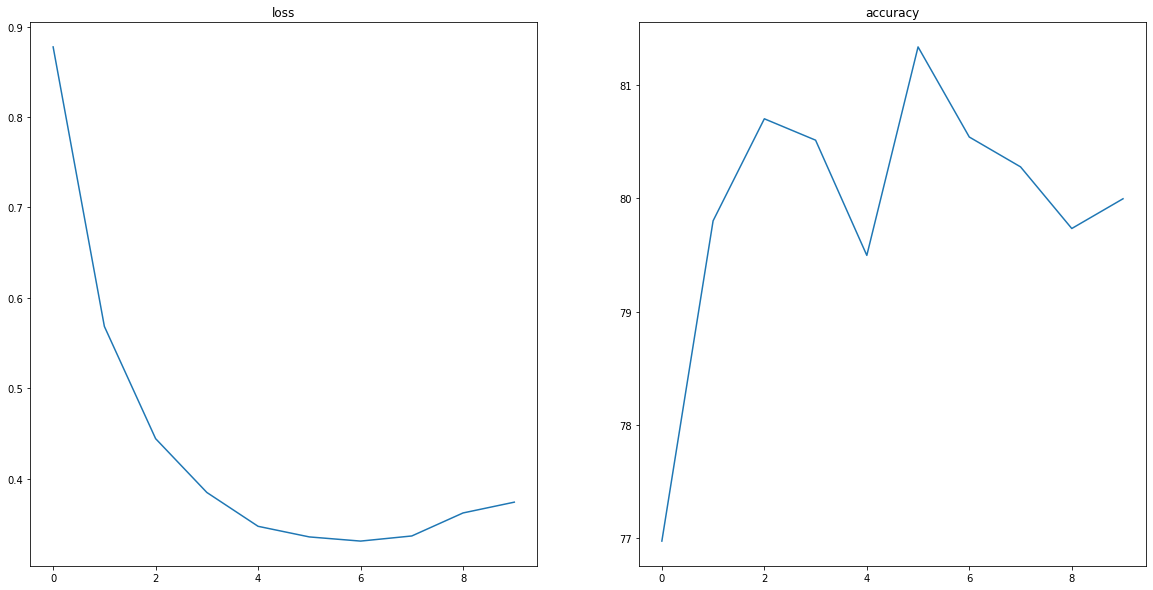

In [107]:
#To plot the training metrics, use the matplotlib library.

# *****START OF YOUR CODE*****
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('loss')

plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title('accuracy')


plt.show()

# *****END OF YOUR CODE*****

In [108]:
# Models accuracy after training
accuracy = evaluate(model, validation_dataloader, tag_pad_idx=pos_to_idx['<PAD>'])
print(f'Accuracy after training: {accuracy*100:.2f}%')

Accuracy after training: 79.84%


In [109]:
# Save the model
torch.save(model.state_dict(), 'pos_tagger_model.pt')

##### Inline question 4: What modifications you need to make to convert this model to a character-level BiLSTM POS tagger?
<font color='red'>Your answer: The input and output layers dimensions will be changed. Also, the preprocessing will be changed since we were processing the text to build word tokens. However, if we want to make it character level we should build a vocab and tokens by characters not words. And since the task is changing it will induce us to change our tags to the character level labels based on the vocab that we have. We should think of seperating numbers, alphabets and symbols now.</font>

# Part III: Initializing BiLSTM with fastText Embeddings

In Part III of this project, you will be combining the power of fastText embeddings with the sequence modeling capability of the BiLSTM model. You will load the pretrained fastText model for Turkish, which was trained by you on a large corpus of Turkish text. The pre-trained model can generate word embeddings for any Turkish word, including words that are not in the training data for our specific task. This is an effective approach to handling the out-of-vocabulary (OOV) words problem that can occur in natural language processing tasks.

After initializing the models, we will train the model on our dataset and evaluate its performance on a held-out development set (same dataset as above). By combining these two powerful models, we hope to achieve better accuracy and robustness in our POS tagging task.

* Optional: Try the embeddings of both skipgram and cbow approach for your evaluation

In [114]:
# Initialize the model
cbow_input_dim1 = len(embed_model_cbow.words)
skipgram_input_dim = len(embed_model_skipgram.words)
embedding_dim = 100
hidden_dim = 256
output_dim = len(pos_to_idx)
n_layers = 2
bidirectional = True
dropout = 0.25
pad_idx = pos_to_idx['<PAD>']
cbow_model1 = BiLSTMPOSTagger(cbow_input_dim1, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout, pad_idx)
skipgram_model1 = BiLSTMPOSTagger(skipgram_input_dim, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout, pad_idx)
cbow_model1 = cbow_model1.to(device)
skipgram_model1 = skipgram_model1.to(device)

# Load the FastText pre-trained embeddings and set them as the model's embedding layer
cbow1_pretrained_embeddings = torch.tensor(embed_model_cbow.get_output_matrix())
skipgram_pretrained_embeddings = torch.tensor(embed_model_skipgram.get_output_matrix())

cbow_model1.embedding.weight.data.copy_(cbow1_pretrained_embeddings), skipgram_model1.embedding.weight.data.copy_(skipgram_pretrained_embeddings)

(tensor([[-0.0652, -0.0496, -0.1289,  ...,  0.1098, -0.0151,  0.0172],
         [-0.0882,  0.0119, -0.1088,  ...,  0.0485, -0.0427,  0.0403],
         [-0.0704,  0.0132, -0.1070,  ...,  0.1066, -0.0578,  0.0656],
         ...,
         [-0.5235, -0.1207, -0.1319,  ...,  0.1493, -0.2396, -0.1081],
         [-0.5871, -0.1143, -0.3157,  ..., -0.0854, -0.2768, -0.2058],
         [-0.5705, -0.1231, -0.0912,  ...,  0.1416, -0.2086, -0.2494]],
        device='cuda:0'),
 tensor([[-0.2062,  0.0387,  0.1574,  ...,  0.1105,  0.1624, -0.1949],
         [-0.2766,  0.2054,  0.1665,  ...,  0.2257,  0.0590, -0.1537],
         [-0.1868,  0.1892,  0.0894,  ...,  0.1631,  0.0142, -0.1599],
         ...,
         [-0.4569,  0.3799, -0.1453,  ..., -0.2233,  0.4600, -0.1414],
         [-0.4502,  0.4531, -0.2549,  ..., -0.4144,  0.4937, -0.4603],
         [-0.1266,  0.2128, -0.1720,  ..., -0.1960,  0.5005, -0.1730]],
        device='cuda:0'))

In [115]:
#Define hyperparameters

NUM_OF_EPOCHS = 10
LEARNING_RATE = 0.01

In [116]:
cbow_optimizer = optim.Adam(cbow_model1.parameters(), lr=LEARNING_RATE)
skipgram_optimizer = optim.Adam(skipgram_model1.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss(ignore_index=pos_to_idx['<PAD>'])
criterion = criterion.to(device)


 cbow: epoch 1 -   training_loss: 0.850024836718059  - validation_accuracy: 81.22896072341175%

 cbow: epoch 2 -   training_loss: 0.359444961909846  - validation_accuracy: 79.4705488332888%

 cbow: epoch 3 -   training_loss: 0.24942715008758376  - validation_accuracy: 82.64797955024534%

 cbow: epoch 4 -   training_loss: 0.20156636546064383  - validation_accuracy: 82.76963742767892%

 cbow: epoch 5 -   training_loss: 0.17974513891958402  - validation_accuracy: 83.4378241038904%

 cbow: epoch 6 -   training_loss: 0.1676489982246345  - validation_accuracy: 82.91750317666589%

 cbow: epoch 7 -   training_loss: 0.16388312364989494  - validation_accuracy: 83.2812892227638%

 cbow: epoch 8 -   training_loss: 0.15917571647222475  - validation_accuracy: 82.86257439512548%

 cbow: epoch 9 -   training_loss: 0.151414406722026  - validation_accuracy: 82.80372115654674%

 cbow: epoch 10 -   training_loss: 0.1509577160029382  - validation_accuracy: 82.29763212242747%


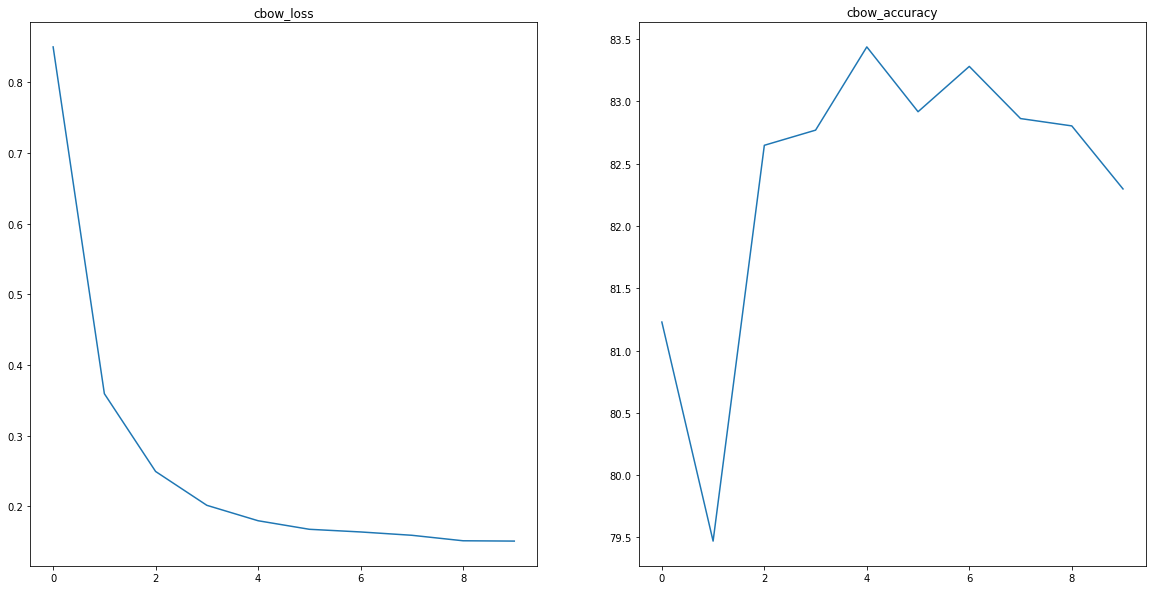


 skipgram: epoch 1 -   training_loss: 0.7965652673031951  - validation_accuracy: 81.40277915853795%

 skipgram: epoch 2 -   training_loss: 0.3642275638832543  - validation_accuracy: 77.88915701997958%

 skipgram: epoch 3 -   training_loss: 0.24353227582302128  - validation_accuracy: 80.25387118502361%

 skipgram: epoch 4 -   training_loss: 0.20321725996508888  - validation_accuracy: 82.41145005071067%

 skipgram: epoch 5 -   training_loss: 0.19171042989397452  - validation_accuracy: 83.37259166608982%

 skipgram: epoch 6 -   training_loss: 0.18507906691873538  - validation_accuracy: 82.8945699261456%

 skipgram: epoch 7 -   training_loss: 0.18454359290304548  - validation_accuracy: 82.23979201743273%

 skipgram: epoch 8 -   training_loss: 0.18525048882603173  - validation_accuracy: 82.4530449340014%

 skipgram: epoch 9 -   training_loss: 0.18703948699136372  - validation_accuracy: 82.66844836676994%

 skipgram: epoch 10 -   training_loss: 0.18522122064147328  - validation_accuracy: 82

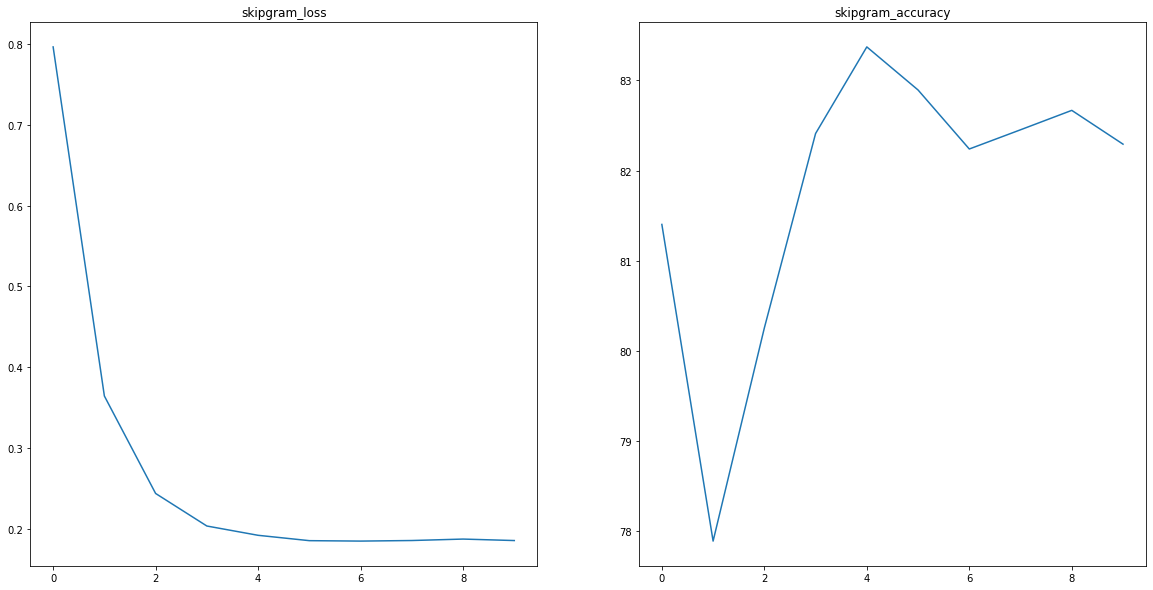

In [117]:
# Plot the loss and accuracy curves
# *****START OF YOUR CODE*****
loss_history = []
accuracy_history = []
for x in range(NUM_OF_EPOCHS):
    training_loss, training_acc = train_for_single_epoch(cbow_model1, training_dataloader, cbow_optimizer, criterion, device)
    validation_accuracy = evaluate(cbow_model1, validation_dataloader, tag_pad_idx=pos_to_idx['<PAD>'])
    loss_history.append(training_loss)
    accuracy_history.append(validation_accuracy *100)
    print('\n cbow: epoch {} -   training_loss: {}  - validation_accuracy: {}%'.format(x+1 ,training_loss, validation_accuracy *100))

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('cbow_loss')

plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title('cbow_accuracy')


plt.show()


loss_history = []
accuracy_history = []
for x in range(NUM_OF_EPOCHS):
    training_loss, training_acc = train_for_single_epoch(skipgram_model1, training_dataloader, skipgram_optimizer, criterion, 'cpu')
    validation_accuracy = evaluate(skipgram_model1, validation_dataloader, tag_pad_idx=pos_to_idx['<PAD>'])
    loss_history.append(training_loss)
    accuracy_history.append(validation_accuracy *100)
    print('\n skipgram: epoch {} -   training_loss: {}  - validation_accuracy: {}%'.format(x+1 ,training_loss, validation_accuracy *100))

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('skipgram_loss')

plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title('skipgram_accuracy')


plt.show()

# *****END OF YOUR CODE*****